In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
#Get dataset from https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge

In [2]:
from google.colab import files
uploaded = files.upload()

Saving sample_submission.csv to sample_submission.csv
Saving test.csv to test.csv
Saving test_labels.csv to test_labels.csv
Saving train.csv to train.csv


In [3]:
train=pd.read_csv('train.csv',index_col=False)
test=pd.read_csv('test.csv',index_col=False)

In [4]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


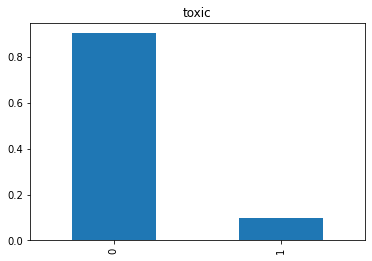

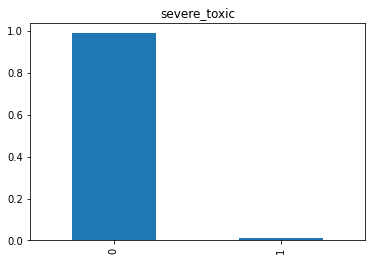

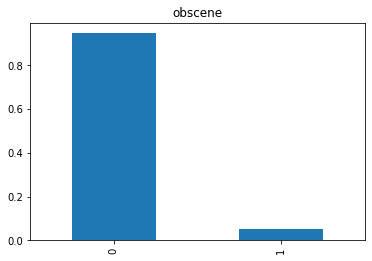

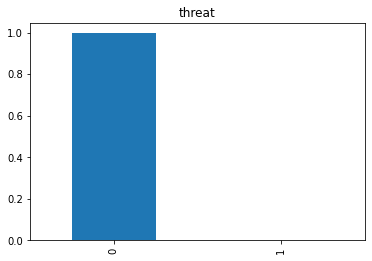

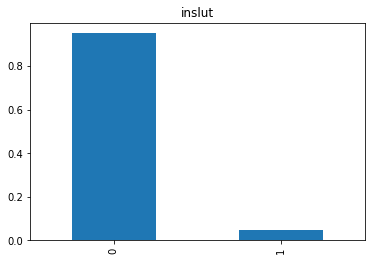

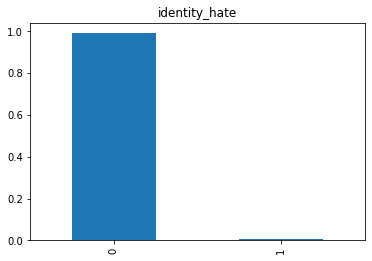

In [6]:
import matplotlib.pyplot as plt
train.toxic.value_counts(normalize=True).plot.bar(title='toxic')
plt.show()
train.severe_toxic.value_counts(normalize=True).plot.bar(title='severe_toxic')
plt.show()
train.obscene.value_counts(normalize=True).plot.bar(title='obscene')
plt.show()
train.threat.value_counts(normalize=True).plot.bar(title='threat')
plt.show()
train.insult.value_counts(normalize=True).plot.bar(title='inslut')
plt.show()
train.identity_hate.value_counts(normalize=True).plot.bar(title='identity_hate')
plt.show()

In [7]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding,Dense,GlobalMaxPool1D,Dropout,Flatten,Bidirectional,LSTM
from keras.models import Sequential

In [9]:
num_words=(2000)
max_len=200
tokenizer=Tokenizer(2000)
#Tokenizing the train data comments
tokenizer.fit_on_texts(train.comment_text)
#converting text to sequences 
train_sequences=tokenizer.texts_to_sequences(train.comment_text)
test_sequences=tokenizer.texts_to_sequences(test.comment_text)
#padding the sequences
padded_train=pad_sequences(train_sequences,maxlen=max_len)
padded_test=pad_sequences(test_sequences,maxlen=max_len)
y=train.iloc[:,2:].values
#y.head()

In [10]:
train_sequences[:1]

[[688,
  75,
  1,
  126,
  130,
  177,
  29,
  672,
  1116,
  86,
  331,
  51,
  50,
  15,
  60,
  148,
  7,
  34,
  117,
  1221,
  4,
  45,
  59,
  244,
  1,
  365,
  31,
  1,
  38,
  27,
  143,
  73,
  89,
  985]]

In [11]:
model=Sequential([Embedding(num_words,32,input_length=max_len),
                 Bidirectional(LSTM(32,return_sequences=True)),
                 GlobalMaxPool1D(),
                 Dense(32,activation='relu'),
                  Dense(6,activation='sigmoid')
                 ])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')
batch_size=20
epoch=2
LSTM_model=model.fit(padded_train,y,batch_size,epochs=epoch,validation_split=.25,steps_per_epoch=300)

Epoch 1/2
300/300 [==============================] - 67s 213ms/step - loss: 0.2848 - accuracy: 0.5100 - val_loss: 0.1237 - val_accuracy: 0.9941
Epoch 2/2
300/300 [==============================] - 64s 213ms/step - loss: 0.1145 - accuracy: 0.9956 - val_loss: 0.0964 - val_accuracy: 0.9941


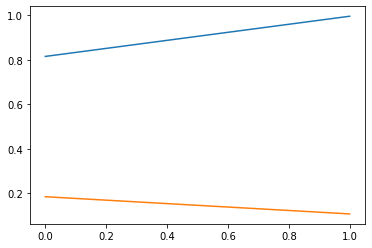

In [12]:
plt.plot(LSTM_model.history['accuracy'])
plt.plot(LSTM_model.history['loss'])

In [13]:
predicted = model.predict(padded_test)
predicted

array([[0.11872485, 0.00466979, 0.04683718, 0.00132102, 0.05385083,
        0.00623587],
       [0.08348361, 0.00314888, 0.03019845, 0.00086918, 0.03465393,
        0.00445175],
       [0.07326585, 0.00319248, 0.02869242, 0.00101224, 0.0348995 ,
        0.00426233],
       ...,
       [0.05405372, 0.00201908, 0.01958138, 0.0007098 , 0.02082714,
        0.00330502],
       [0.03910804, 0.00152552, 0.01493758, 0.00058246, 0.01596302,
        0.00257185],
       [0.2127944 , 0.00904784, 0.08309436, 0.0018155 , 0.10442773,
        0.00978321]], dtype=float32)

In [14]:
test['toxic']=predicted[:,:1]
test['severe_toxic']=predicted[:,1:2]
test['obscene']=predicted[:,2:3]
test['threat']=predicted[:,3:4]
test['insult']=predicted[:,4:5]
test['identity_hate']=predicted[:,5:6]
test.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,0.118725,0.004670,0.046837,0.001321,0.053851,0.006236
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,0.083484,0.003149,0.030198,0.000869,0.034654,0.004452
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",0.073266,0.003192,0.028692,0.001012,0.034900,0.004262
3,00017563c3f7919a,":If you have a look back at the source, the in...",0.056930,0.001925,0.020388,0.000696,0.019669,0.003456
4,00017695ad8997eb,I don't anonymously edit articles at all.,0.095671,0.003850,0.036103,0.001149,0.042458,0.005375


In [15]:
test.drop(['comment_text'],axis=1,inplace=True)
test.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.118725,0.004670,0.046837,0.001321,0.053851,0.006236
1,0000247867823ef7,0.083484,0.003149,0.030198,0.000869,0.034654,0.004452
2,00013b17ad220c46,0.073266,0.003192,0.028692,0.001012,0.034900,0.004262
3,00017563c3f7919a,0.056930,0.001925,0.020388,0.000696,0.019669,0.003456
4,00017695ad8997eb,0.095671,0.003850,0.036103,0.001149,0.042458,0.005375


In [17]:
test.to_csv('toxic_comments_classification_result.csv',index=False)